In [1]:
import os
import glob
import time
import json
import datetime
from datetime import datetime

import networkx as nx
import math

## Setup Plot Settings

In [2]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

# Data Paths

In [99]:
#data_path = "/DATA/7A/assets/erc20networks/WrappedBTC/"
data_path = "/DATA/7A/assets/erc721networks/GodsUnchainedCards/"

graph_name = "GodsUnchainedCards"

In [100]:
with open(data_path + graph_name + '.json') as f:
    graph_info = json.load(f)
graph_info['name'], graph_info['#nodes'], graph_info['#edges']

('Sorare', 10331, 414618)

# Create NetworkX Graph

In [101]:
def convertTimestamp(Ts):
    timestamp = datetime.fromtimestamp(Ts)
    return timestamp

In [102]:
#create multidigraph
edges = graph_info["edges"]

graph = nx.MultiDiGraph()
for e in edges:
    u = e[0]
    v = e[1]
    
    t = convertTimestamp(e[2])
    graph.add_edge(u, v, timestamp=t)
    #print(t)
    #if t >= datetime.strptime('2020-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') and t <= datetime.strptime('2020-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'):
    #    graph.add_edge(u, v, timestamp=t)
    #if t > datetime.strptime('2021-12-31 23:59:59', '%Y-%m-%d %H:%M:%S'):
    #    break
print(nx.info(graph))
nx.info(graph)
#print("Reciprocity of "+graph_name+" is:", nx.overall_reciprocity(graph))
#print("Assortativity of "+graph_name+" is:", nx.degree_pearson_correlation_coefficient(graph))
#print("Average Clustering Coeff of "+ graph_name +" is: ", nx.average_clustering(graph))

Name: 
Type: MultiDiGraph
Number of nodes: 10331
Number of edges: 414618
Average in degree:  40.1334
Average out degree:  40.1334


'Name: \nType: MultiDiGraph\nNumber of nodes: 10331\nNumber of edges: 414618\nAverage in degree:  40.1334\nAverage out degree:  40.1334'

### get gephi output

In [103]:
# Export to Gexf file.
#nx.write_gexf(graph, '{}'.format(data_path + graph_name + ".gexf"))

## create network snapshots

In [142]:
time_period = 60*60*24*90 # 90 day periods

mindelta = edges[0][2]
maxdelta = edges[0][2]
for e in edges:
    if e[2] > maxdelta:
        maxdelta = e[2]
    if e[2] < mindelta:
        mindelta = e[2]
print(mindelta, maxdelta)
duration = maxdelta - mindelta
num_snapshots = math.ceil(duration / time_period)
print("Number of snapshots", num_snapshots)

graphs = []
for x in range(0,num_snapshots):
    #tg = nx.MultiDiGraph()
    #tg["name"] = str(x)
    graphs.append(nx.MultiDiGraph())
    

for u,v,t in graph.edges(data=True):
    idx = math.floor((t["timestamp"].timestamp() - mindelta) / time_period)
    graphs[idx].add_edge(u, v)
    
for g in graphs:
    print(nx.info(g))

1533124251 1615234132
Number of snapshots 11
Name: 
Type: MultiDiGraph
Number of nodes: 2023
Number of edges: 4427
Average in degree:   2.1883
Average out degree:   2.1883
Name: 
Type: MultiDiGraph
Number of nodes: 442
Number of edges: 2965
Average in degree:   6.7081
Average out degree:   6.7081
Name: 
Type: MultiDiGraph
Number of nodes: 531
Number of edges: 4471
Average in degree:   8.4200
Average out degree:   8.4200
Name: 
Type: MultiDiGraph
Number of nodes: 514
Number of edges: 3352
Average in degree:   6.5214
Average out degree:   6.5214
Name: 
Type: MultiDiGraph
Number of nodes: 489
Number of edges: 1885
Average in degree:   3.8548
Average out degree:   3.8548
Name: 
Type: MultiDiGraph
Number of nodes: 281
Number of edges: 1245
Average in degree:   4.4306
Average out degree:   4.4306
Name: 
Type: MultiDiGraph
Number of nodes: 290
Number of edges: 1436
Average in degree:   4.9517
Average out degree:   4.9517
Name: 
Type: MultiDiGraph
Number of nodes: 715
Number of edges: 4055
Ave

# Analysis

In [143]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

## hub vertices

- which tokens share hubs? (if they share any)

- can we find liquidity providers by checking neighbors of hub vertices?


In [144]:
degrees = graph.degree
print("All time:")
print(sorted(degrees, key=lambda t: t[1], reverse=True)[:5])
c = 0
for g in graphs:
    print("T =", c)
    c += 1
    print(sorted(g.degree, key=lambda t: t[1], reverse=True)[:5])

All time:
[('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 14300), ('0x0ce13e66bef17801c9f19fb763be2dd2f391d7c2', 2049), ('0x461f1c5768cdb7e567a84e22b19db0eaba069bad', 1541), ('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 1465), ('0x6f2548b1bee178a49c8ea09be6845f6aeaf3e8da', 1267)]
T = 0
[('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 1678), ('0x461f1c5768cdb7e567a84e22b19db0eaba069bad', 1539), ('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 477), ('0xec3d2c52b157781b79ca26c9ddcaf792b03fb29b', 314), ('0x14e421986c5ff2951979987cdd82fa3c0637d569', 281)]
T = 1
[('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 2140), ('0xec3d2c52b157781b79ca26c9ddcaf792b03fb29b', 330), ('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 249), ('0x14e421986c5ff2951979987cdd82fa3c0637d569', 174), ('0x8e215d06ea7ec1fdb4fc5fd21768f4b34ee92ef4', 173)]
T = 2
[('0x112ca67c8e9a6ac65e1a2753613d37b89ab7436b', 3539), ('0x8fdc07cc76529566bbe2991401541df8b011db61', 521), ('0x1820ffad63fd64d7077da4355e9641dfff4dad0d', 400), ('0x

## degree distribution

- is there a difference between erc20 and erc721 degree distributions?
- user profiling => degree distribution of users across graphs 
- user activity profiling => temporal degree distribution 
    - for diffent time granularities

Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...
Creating histogram...


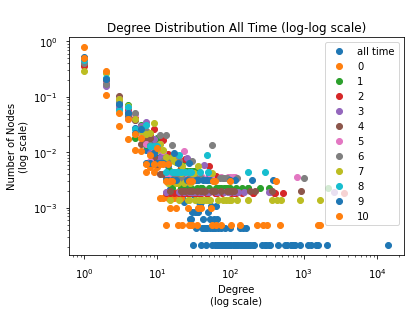

In [145]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

x, y = plot_degree_histogram(graph)
plt.title('\nDegree Distribution All Time (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(x, y, 'o', label = "all time")

c = 0
for g in graphs:
    x, y = plot_degree_histogram(g)
    plt.plot(x, y, 'o', label=c)
    c += 1
plt.legend()

- degree distribution could show us whales in marketplaces?
- nft galleries? :)
    
**Degree distribution at a **

- degree distribution change 

# pdf

powerlaw package
fit a power law curve
how th exponent is changing over time

* cdf of the data

In [146]:
degrees = graph.degree
data = [i[1] for i in degrees]
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal_positive')

2.038456291555743
0.05898035401374046


Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


(7.719356762063792, 0.031187474900341083)

In [147]:
for g in graphs:
    degrees = g.degree
    data = [i[1] for i in degrees]
    fit = powerlaw.Fit(data)
    print(fit.power_law.alpha)
    print(fit.power_law.sigma)
    print(fit.distribution_compare('power_law', 'lognormal_positive'))

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


2.0665525036224226
0.0904638026494996
(9.30593094180605, 0.0074359634843241765)
1.9436497698505675
0.10357901867708914
(1.1784914784152596, 0.5319336040319946)
1.9120908605025688
0.06617002572370174
(6.558888821954998, 0.09014669390906342)
1.9485726275904112
0.07253916182939375
(4.7097143169766, 0.19269704953106337)
2.2103674312190025
0.09598838106298266
(19.514590218491755, 4.957705367870169e-06)
2.048519979899784
0.08449214780426763
(15.067308915722988, 0.0008808644604174902)
2.166622966946766
0.16335989061852235
(1.197960511586214, 0.41891618522992524)
2.066727937206993
0.1077557940114575
(3.1812768357151304, 0.106498115197646)
2.265325812318036
0.11409058629280756
(15.607218761686257, 0.0002869618866145542)
2.080749901879952
0.11455926048098308
(6.510459292507969, 0.012599320370200017)
2.249113422354938
0.15037558495108394
(5.152025391696606, 0.058741899958162314)


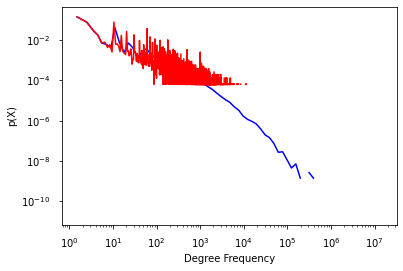

In [36]:
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)

figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree Frequency")
figname = 'Degree Distribution'

In [94]:
def plot_basics(data, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax1 = fig.add_subplot(n_graphs,n_data,data_inst)
    x, y = pdf(data, linear_bins=True)
    ind = y>0
    y = y[ind]
    x = x[:-1]
    x = x[ind]
    ax1.scatter(x, y, color='r', s=.5)
    #plot_pdf(data[data>0], ax=ax1, color='b', linewidth=2)
    plot_pdf(data, ax=ax1, color='b', linewidth=2)
    from pylab import setp
    setp( ax1.get_xticklabels(), visible=False)

    if data_inst==1:
        ax1.annotate("A", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    
    from mpl_toolkits.axes_grid.inset_locator import inset_axes
    ax1in = inset_axes(ax1, width = "30%", height = "30%", loc=3)
    ax1in.set_xticks([])
    ax1in.set_yticks([])

    
    ax2 = fig.add_subplot(n_graphs,n_data,n_data+data_inst, sharex=ax1)
    plot_pdf(data, ax=ax2, color='b', linewidth=2)
    fit = Fit(data, xmin=1, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle=':', color='g')
    p = fit.power_law.pdf()

    ax2.set_xlim(ax1.get_xlim())
    
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax2, linestyle='--', color='g')
    from pylab import setp
    setp( ax2.get_xticklabels(), visible=False)

    if data_inst==1:
       ax2.annotate("B", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)        
       ax2.set_ylabel(u"p(X)")# (10^n)")
        
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)#, sharex=ax1)#, sharey=ax2)
    fit.power_law.plot_pdf(ax=ax3, linestyle='--', color='g', label="power-law")
    fit.exponential.plot_pdf(ax=ax3, linestyle='--', color='r', label="exponential")
    fit.lognormal_positive.plot_pdf(ax=ax3, linestyle='--', color='b', label="lognormal-positive")
    #fit.lognormal.plot_pdf(ax=ax3, linestyle='--', color='b')
    fit.plot_pdf(ax=ax3, color='b', linewidth=2)
    
    print(ax2.get_ylim())
    print(ax1.get_xlim())
    ax3.set_ylim(ax2.get_ylim())
    ax3.set_xlim(ax1.get_xlim())
    
    if data_inst==1:
        ax3.annotate("C", annotate_coord, xycoords="axes fraction", fontproperties=panel_label_font)

    ax3.set_xlabel(units)

def ppp(data, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    ax3 = fig.add_subplot(n_graphs,n_data,n_data*2+data_inst)
    fit = Fit(data, discrete=True)
    fit.power_law.plot_pdf(ax=ax3,linestyle='--', color='g', label="power-law")
    fit.exponential.plot_pdf(ax=ax3,linestyle='--', color='r', label="exponential")
    fit.lognormal_positive.plot_pdf(ax=ax3,linestyle='--', color='b', label="lognormal-positive")
    fit.plot_pdf(color='b', linewidth=2)
    ax3.set_ylim((2.832399908207049e-10, 10.0e-2))
    ax3.set_xlim((10, 32585827.619235393))
    ax3.set_ylabel("p(x)")
    ax3.set_xlabel(units)
    #ax3.set_xlim(ax1.get_xlim())
    

Calculating best minimal value for power law fit
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/aakyildiz/anaconda3/envs/erc/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


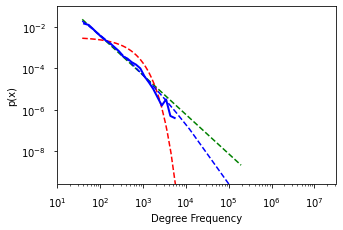

In [104]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

n_data = 1 #len(graphs)
n_graphs = 4
f = plt.figure(figsize=(5,15))

data_inst = 1
#for g in graphs:
if True:
    degrees = graph.degree
    data = [i[1] for i in degrees]
    units = 'Degree Frequency'
    #plot_basics(data, data_inst, f, units)
    ppp(data, f, units)
#    data_inst += 1

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
f.savefig(graph_name+'.png', bbox_inches='tight')
#f.savefig(figname+'.tiff', bbox_inches='tight', dpi=300)